Que 4. Create a classification model to predict the value of the Type column.

In [1]:
import pandas as pd

#Read given Freelance platform Project dataset
df=pd.read_csv('Freelance Platform Projects.csv')

df.head() #Display first five records

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer


In [2]:
df.info() #Detailed inofrmation about dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      12222 non-null  object 
 1   Category Name              12222 non-null  object 
 2   Experience                 12222 non-null  object 
 3   Sub Category Name          12222 non-null  object 
 4   Currency                   12222 non-null  object 
 5   Budget                     12222 non-null  float64
 6   Location                   12222 non-null  object 
 7   Freelancer Preferred From  12222 non-null  object 
 8   Type                       12222 non-null  object 
 9   Date Posted                12222 non-null  object 
 10  Description                12222 non-null  object 
 11  Duration                   1602 non-null   object 
 12  Client Registration Date   12222 non-null  object 
 13  Client City                12222 non-null  obj

In [3]:
df.shape #Number of rows and columns in datasets (size of dataset)

(12222, 17)

### EDA And Preprocessing

In [4]:
df.isna().sum() #identification of null values /Handeling missing values

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Description                      0
Duration                     10620
Client Registration Date         0
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

In [5]:
df.columns #show the present columns in dataset

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Location', 'Freelancer Preferred From', 'Type',
       'Date Posted', 'Description', 'Duration', 'Client Registration Date',
       'Client City', 'Client Country', 'Client Currency', 'Client Job Title'],
      dtype='object')

In [6]:
df.drop(columns=['Duration','Client Job Title'],inplace=True) #Delete the columns which are not required.

In [7]:
df.columns #show the present columns in dataset post dropping unnecessary columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Location', 'Freelancer Preferred From', 'Type',
       'Date Posted', 'Description', 'Client Registration Date', 'Client City',
       'Client Country', 'Client Currency'],
      dtype='object')

In [8]:
df.shape #Number of rows and columns in datasets (size of dataset) post dropping unnecessary

(12222, 15)

In [9]:
df.dtypes # Verify the data type of all columns 

Title                         object
Category Name                 object
Experience                    object
Sub Category Name             object
Currency                      object
Budget                       float64
Location                      object
Freelancer Preferred From     object
Type                          object
Date Posted                   object
Description                   object
Client Registration Date      object
Client City                   object
Client Country                object
Client Currency               object
dtype: object

In [10]:
# perform X, Y Split of dataset columns for further model training

x=df.drop(columns=['Type']) #x has all the columns except 'Type'
y=df['Type'] #y has only 'Type' column

In [11]:
obj_cols = x.select_dtypes('object').columns #making array of all columns form X dataset having object datatype for further encoding
obj_cols

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Location', 'Freelancer Preferred From', 'Date Posted', 'Description',
       'Client Registration Date', 'Client City', 'Client Country',
       'Client Currency'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder 
# change/encode datatype of all columns having object datatype for x dataset
for col in obj_cols:      
    encoder = LabelEncoder() # label encoder is used for Encoding
    x[col] = encoder.fit_transform(x[col])

x.dtypes

Title                          int32
Category Name                  int32
Experience                     int32
Sub Category Name              int32
Currency                       int32
Budget                       float64
Location                       int32
Freelancer Preferred From      int32
Date Posted                    int32
Description                    int32
Client Registration Date       int32
Client City                    int32
Client Country                 int32
Client Currency                int32
dtype: object

<Axes: >

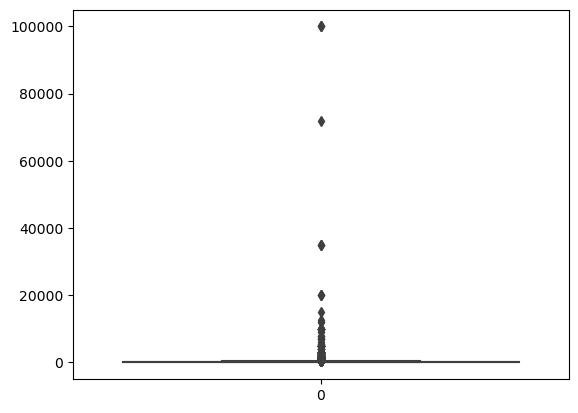

In [13]:
# Indetify Outliers and Handling
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x['Budget'])

In [14]:
#Checking skewness since Ouliers box plot is difficult to perform further processing

x['Budget'].skew() 

42.455398395555996

In [15]:
#need to handle skewness as its not less that 5, Skewness is handled with boxcox
from scipy.stats import boxcox
x['Budget']=x['Budget']+1
x['Budget']=boxcox(x['Budget']+1)[0]
x['Budget'].skew()

-0.010182795811508298

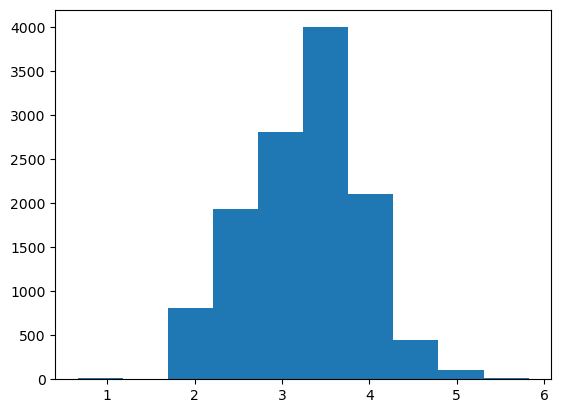

In [16]:
#Histogram for budget to view skewness handled or not
plt.hist(x['Budget'])
plt.show()

<Axes: >

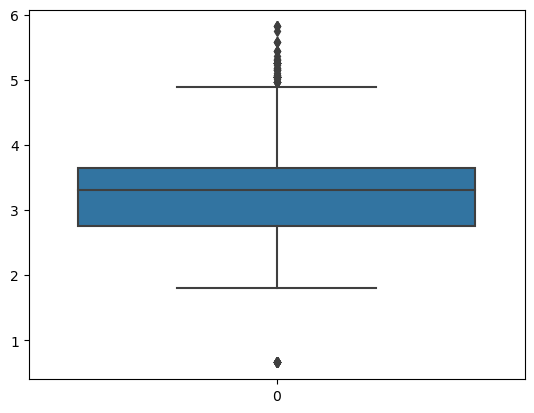

In [17]:
#post skewness handling again check outliers
sns.boxplot(x['Budget'])

<Axes: >

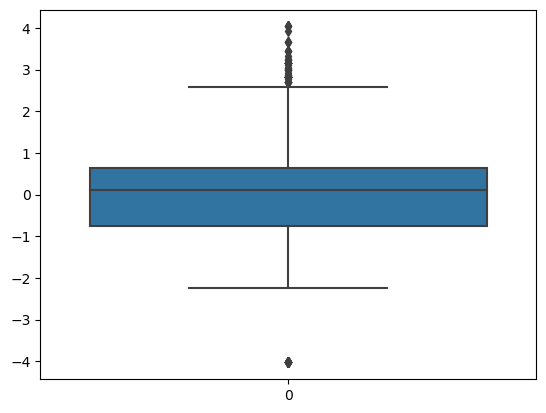

In [18]:
#Scaling need to be performed to further handel outliers
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x['Budget']=scaler.fit_transform(x[['Budget']])
sns.boxplot(x['Budget'])

In [19]:
y.value_counts()  # Check value count of target Y

fixed_price    10437
hourly          1785
Name: Type, dtype: int64

In [20]:
# Identifying outliers and saving inot variable for further deletion
outliers = x[(x['Budget']>2)|(x['Budget']<-2)].index
outliers

Int64Index([    4,     8,    14,    43,    68,    90,   110,   211,   223,
              262,
            ...
            11745, 11816, 11840, 11980, 11985, 11994, 12000, 12038, 12100,
            12204],
           dtype='int64', length=419)

In [21]:
x.drop(outliers, axis=0, inplace=True) #outliers rows are deleted from x
y.drop(outliers, axis=0, inplace=True) #outliers rows are deleted from y

In [22]:
y.value_counts()  # Check value count of target Y post outliers deletion

fixed_price    10056
hourly          1747
Name: Type, dtype: int64

<Axes: >

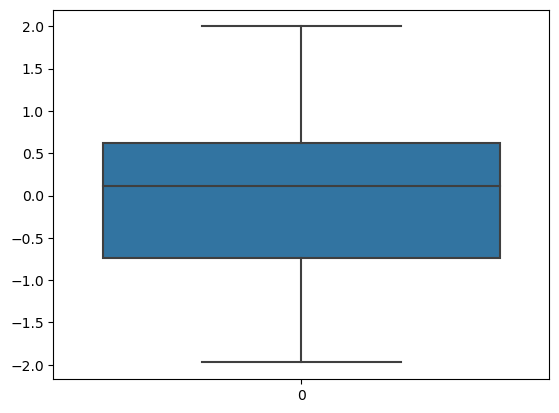

In [23]:
#Boxplot after removing the outliers
sns.boxplot(x['Budget'])

### Classification Model Slection and training

XGBoost Classifier Model

In [24]:
#Label Encoding for column 'Type' i.e Target Variable Y
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

y.dtype

dtype('int32')

In [25]:
from sklearn.model_selection import train_test_split 

# Split data into training and testing

xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                                                train_size=0.8,
                                                random_state = 4)

In [26]:
#XGBoost Model

import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(xtrain,ytrain)
trainpred=model.predict(xtrain)
trainpred[:5]

array([0, 0, 0, 0, 1])

In [27]:
#Classification report for training data
from sklearn.metrics import classification_report
print(classification_report(ytrain,trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8056
           1       1.00      1.00      1.00      1386

    accuracy                           1.00      9442
   macro avg       1.00      1.00      1.00      9442
weighted avg       1.00      1.00      1.00      9442



In [28]:
#Classification report for testing data
testpred = model.predict(xtest)
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2000
           1       0.87      0.78      0.82       361

    accuracy                           0.95      2361
   macro avg       0.92      0.88      0.90      2361
weighted avg       0.95      0.95      0.95      2361



Here XGB Boost Model is giving better Accuracy, F1 Score, Precision etc. compare to other model, Hence ita a best fit model.